In [6]:
from glob import glob
import numpy as np
import pandas as pd
from PIL import Image
from random import random
import matplotlib.pyplot as plt

PATH_TO_DATASET = "C:/Users/alper/Desktop/bitirme/mnist_png"

In [3]:
def read_dataset_and_split(PATH_TO_DATASET):
    """
    reads the dataset and returns a dataframe containing the images and their labels
    params:
        PATH_TO_DATASET : str : path to the dataset
    returns:
        df : pd.DataFrame : dataframe containing the images and their labels
    dataset download link : https://www.kaggle.com/datasets/playlist/mnistzip
    """
    dataset = {}
    for i in range(10):
        dataset[i] = []
    image_paths = glob(PATH_TO_DATASET + "/**/*.png", recursive=True)
    for image_path in image_paths:
        image_path = image_path.replace('\\', '/')
        dataset[int(image_path.split('/')[-2])] += [image_path]

    df = pd.DataFrame({'Label':[0],'Image':[Image.open(dataset[0][0]).convert('L')]})
    for key, value in dataset.items():
        for val in value:
            row = {'Label':[key], 'Image': [Image.open(val).convert('L')]}
            temp = pd.DataFrame(row)
            df = pd.concat([df, temp], ignore_index = True)
    df = df[1:]

    # Shuffle the df 
    df = df.sample(frac=1, ignore_index=True)
    train_x, train_y, test_x, test_y = [], [], [], []
    length = len(df)
    idx = 0
    for i in range(length):
        row = df.iloc[i]
        if idx < length*0.95:
            train_x.append(np.asarray(row['Image']).reshape(784))
            train_y.append(row['Label'])
        else:
            test_x.append(np.asarray(row['Image']).reshape(784))
            test_y.append(row['Label'])
        idx += 1

    # Get the transpose of x  and convert to numpy array
    train_x = np.array(train_x).T / 255
    train_y = np.array(train_y)
    test_x = np.array(test_x).T / 255
    test_y = np.array(test_y)

    print(f'shape train_x: {train_x.shape}, shape train_y: {train_y.shape}, shape test_x: {test_x.shape}, shape test_y: {test_y.shape}')

    return train_x, train_y, test_x, test_y


train_x, train_y, test_x, test_y = read_dataset_and_split(PATH_TO_DATASET)

shape train_x: (784, 66500), shape train_y: (66500,), shape test_x: (784, 3500), shape test_y: (3500,)


In [4]:
# UTILS
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def ReLU(x:list)->list: # rectifred linear unit
    return np.array([(row>0)*row for row in x])

def deriv_ReLu(Z):
    return Z > 0

def softmax(z:list)->list:  
    # Compute softmax values for each  sets of scores in z.
    e_z = np.array([np.exp(c_z) for c_z in z.T])
    m = np.array(np.zeros((10,e_z.shape[0])))
    for i in range(len(e_z)):
        row = e_z[i]
        sum_row = sum(row)
        for j in range(len(row)):
            v = row[j]/sum_row
            m[j][i] = v
    return m

def train(train_x, train_y, epoch, learning_rate):
    A0 = train_x
    size = len(A0[0])
    # One hot encoding for labels
    y = np.zeros((10, len(train_y)))
    for i in  range(len(train_y)):
        y[train_y[i]][i] = 1

    # create a 10x784 length W1 layer with 0-1
    W1 = np.array([np.array([random()-0.5 for j in range(784)]) for i in range(10)])
    b1 = np.array([[random()-0.5] for i in range(10)])    # np.array([np.array([random()-0.5 for j in range(size)]) for i in range(10)])
    W2 = np.array([np.array([random()-0.5 for j in range(10)]) for i in range(10)])
    b2 = np.array([[random()-0.5] for i in range(10)])    # np.array([np.array([random()-0.5 for j in range(size)]) for i in range(10)])

    for ep in range(epoch):
        # forward propagation
        Z1 = np.dot(W1,A0)+b1
        A1 = ReLU(Z1)
        Z2 = np.dot(W2,A1)+b2
        A2 = softmax(Z2)

        # backward propagation
        dZ2 = A2 - y
        dW2 = (1/size) * np.dot(dZ2, A1.T)
        db2 = (1/size) * np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2) * deriv_ReLu(Z1)
        dW1 = (1/size) * np.dot(dZ1, A0.T)
        db1  = (1/size) * np.sum(dZ1)

        # update weights and biases using
        W1 -= learning_rate*dW1
        b1 -= (learning_rate)*db1
        W2 -= learning_rate*dW2
        b2 -= (learning_rate)*db2
        
        if ep % 20 == 0:
            print(f'Ite:{ep}  -  Acc:{get_accuracy(get_predictions(A2), train_y)}')
    return W1, b1, W2, b2


A = train(train_x, train_y, 500, 0.1)

Ite:0  -  Acc:0.1011578947368421
Ite:20  -  Acc:0.14237593984962407
Ite:40  -  Acc:0.20442105263157895
Ite:60  -  Acc:0.2552481203007519
Ite:80  -  Acc:0.30603007518796993
Ite:100  -  Acc:0.33810526315789474
Ite:120  -  Acc:0.37840601503759397
Ite:140  -  Acc:0.39213533834586467
Ite:160  -  Acc:0.44657142857142856
Ite:180  -  Acc:0.5300902255639097
Ite:200  -  Acc:0.5957142857142858
Ite:220  -  Acc:0.6434736842105263
Ite:240  -  Acc:0.6765112781954887
Ite:260  -  Acc:0.700015037593985
Ite:280  -  Acc:0.7186466165413534
Ite:300  -  Acc:0.7336691729323308
Ite:320  -  Acc:0.7460902255639098
Ite:340  -  Acc:0.7574736842105263
Ite:360  -  Acc:0.7681804511278195
Ite:380  -  Acc:0.7762556390977443
Ite:400  -  Acc:0.7843007518796993
Ite:420  -  Acc:0.7910225563909774
Ite:440  -  Acc:0.797203007518797
Ite:460  -  Acc:0.8022105263157895
Ite:480  -  Acc:0.8074436090225564


Accuracy: 0.8188571428571428


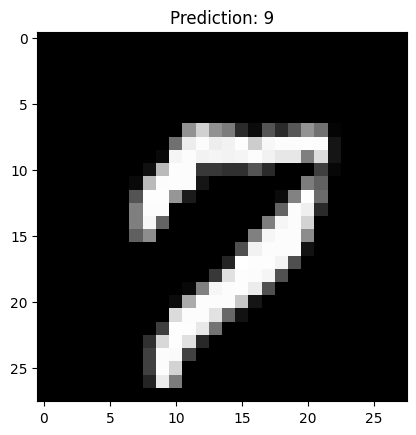

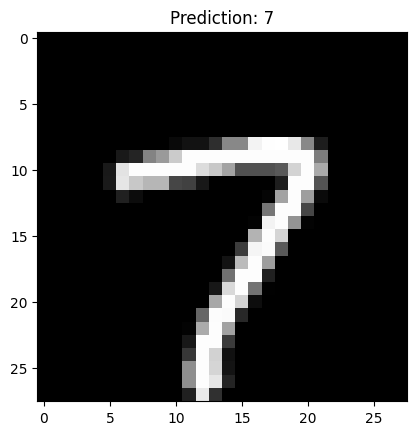

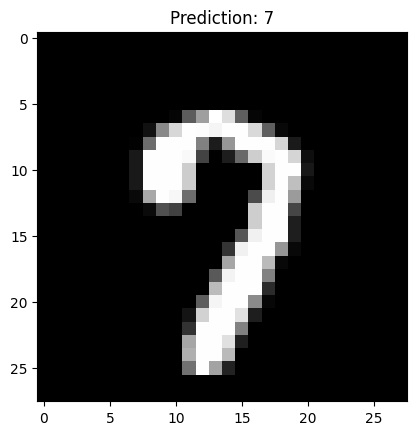

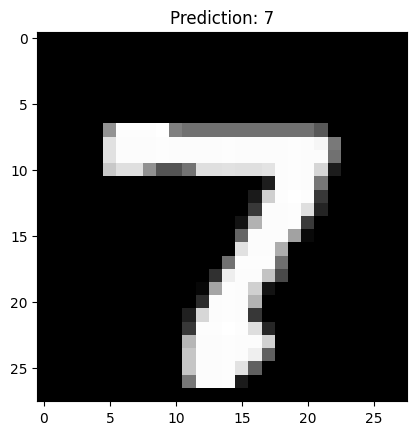

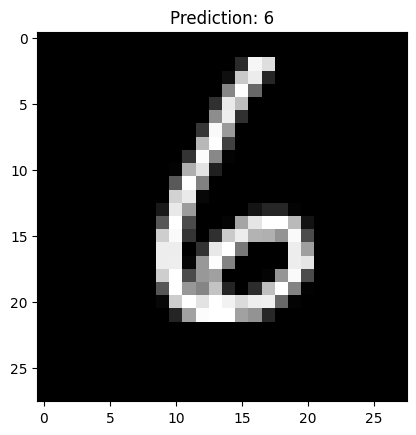

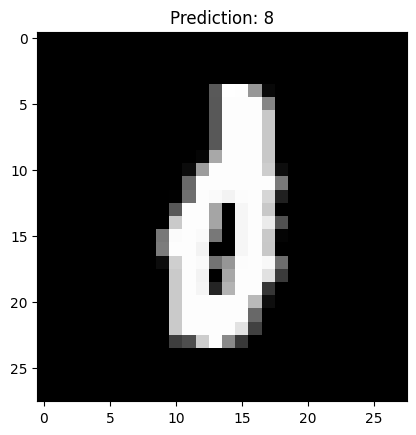

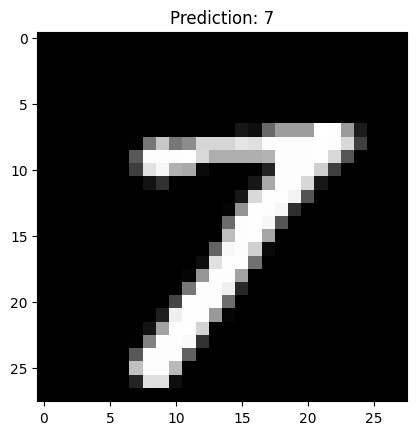

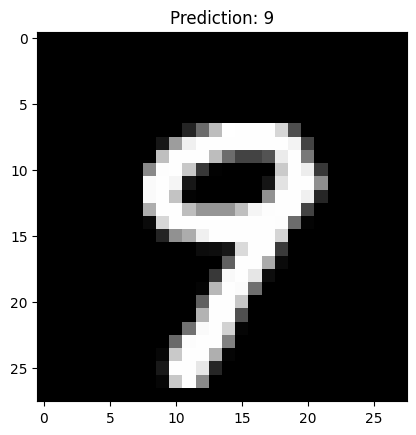

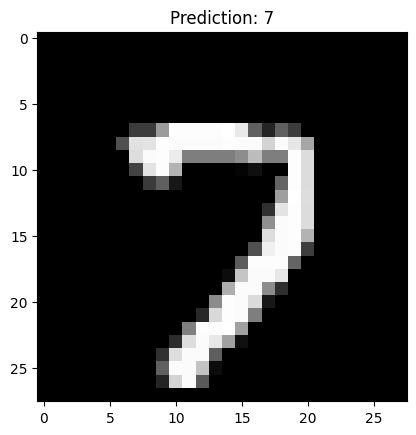

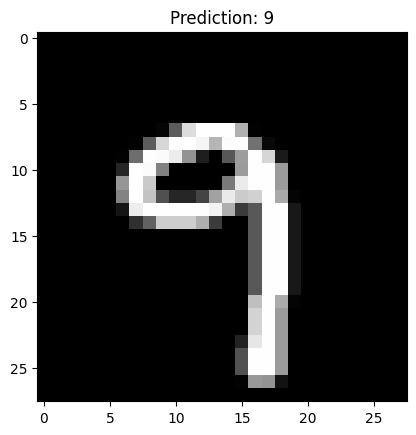

In [7]:
# test and plot
def test(test_x, test_y, A):
    W1, b1, W2, b2 = A
    A0 = test_x
    size = len(A0[0])
    # One hot encoding for labels
    y = np.zeros((10, len(test_y)))
    for i in  range(len(test_y)):
        y[test_y[i]][i] = 1

    # forward propagation
    Z1 = np.dot(W1,A0)+b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = softmax(Z2)

    # get predictions
    predictions = get_predictions(A2)
    print(f'Accuracy: {get_accuracy(predictions, test_y)}')

    # plot
    for i in range(10):
        plt.imshow(test_x[:,i].reshape(28,28), cmap='gray')
        plt.title(f'Prediction: {predictions[i]}')
        plt.show()

test(test_x, test_y, A)